# 6.4 Kyrlov Space Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# init A:
A = np.zeros([64,64])
m = A.shape[0] # rows
n = A.shape[1] # cols

# fill the diagonals
for i in range(m):
    for j in range(n):
        if j == i: # Diagonal
            A[i,j] = 1/np.sqrt(i+1)
        if j == i + 1: # Diagonal + 1
            A[i,j] = 1/np.sqrt(i+1)


### 6.4.1 Eigenvalues of A

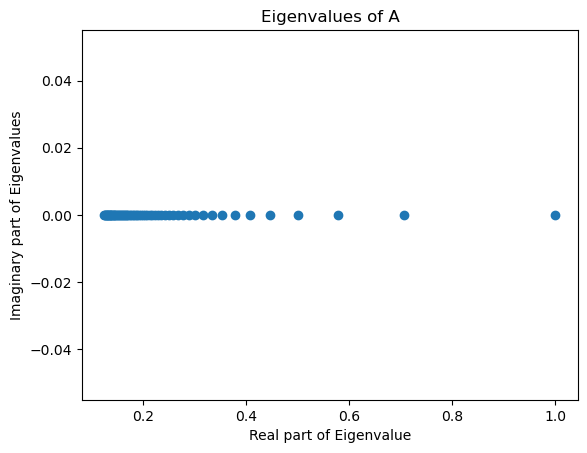

In [3]:
eigenvalues, eigenvectors = np.linalg.eig(A)

plt.scatter(eigenvalues, eigenvalues.imag)
plt.xlabel('Real part of Eigenvalue')
plt.ylabel('Imaginary part of Eigenvalues')
plt.title('Eigenvalues of A')
plt.show()

### 6.4.2 Arnoldi Iteration

In [4]:
def arnoldi_iteration(A, x, m: int):
    """
    Arnoldi iteration to compute an orthonormal basis of the Krylov subspace.

    Input
    ----------
    A : array_like
        An n × n array (matrix).
    x : array_like
        Initial vector (length n).
    m : int
        Dimension of the Krylov subspace minus one (degree of the Krylov subspace).

    Returns
    -------
    Q : numpy.array
        An n x (m + 1) array, where the columns form an orthonormal basis of the Krylov subspace.
    h : numpy.array
        An (m + 1) x m array. Upper Hessenberg matrix representing A in the basis Q.
    """
    h = np.zeros((m + 1, m))
    Q = np.zeros((A.shape[0], m + 1))
    # Normalize the input vector
    Q[:, 0] = x / np.linalg.norm(x)  # q1 = x/norm(x)
    for j in range(1, m + 1):
        r = A @ Q[:, j - 1]  # Generate a new candidate vector
        for i in range(j):  # Subtract the projections on previous vectors
            h[i, j - 1] = np.dot(Q[:, i].conj(), r)
            r = r - h[i, j - 1] * Q[:, i]
        h[j, j - 1] = np.linalg.norm(r, 2)
        # Break Condition
        if h[j, j - 1] == 0: 
            return Q, h
        else:
            Q[:, j] = r / h[j, j - 1]
    return Q, h

### 6.4.3 Ritz values

The eigenvalues of Hn are called the Ritz eigenvalues

In [5]:
def compute_ritz_values(H):
    """Compute the Ritz values, which are the eigenvalues of the Hessenberg matrix H."""
    ritz_values = np.linalg.eigvals(H)
    return ritz_values

In [6]:
np.random.seed(42)  # For reproducibility
x0 = np.random.rand(64)
m = 30

In [7]:
# Run Arnoldi iteration
Q, H_full = arnoldi_iteration(A, x0, m)

# Compute and store the largest Ritz values at each step k
ritz_values_at_steps = []
largest_ritz_values = []
second_largest_ritz_values = []
third_largest_ritz_values = []

for k in range(1, m+1):
    H_k = H_full[:k, :k]  # Upper Hessenberg matrix at step k
    ritz_values = compute_ritz_values(H_k)
    ritz_values_at_steps.append(ritz_values)
    
    # Sort Ritz values by norm in ascending order
    sorted_ritz_values = sorted(ritz_values, key=np.linalg.norm)
    
    # Append the largest Ritz value
    if len(sorted_ritz_values) >= 1:
        largest_ritz_value = sorted_ritz_values[-1]
        largest_ritz_values.append(largest_ritz_value)
    else:
        largest_ritz_values.append(None)  # Append None if it doesn't exist
    
    # Append the second largest Ritz value if it exists
    if len(sorted_ritz_values) >= 2:
        second_largest_ritz_value = sorted_ritz_values[-2]
        second_largest_ritz_values.append(second_largest_ritz_value)
    else:
        second_largest_ritz_values.append(None)  # Append None if it doesn't exist
    
    # Append the third largest Ritz value if it exists
    if len(sorted_ritz_values) >= 3:
        third_largest_ritz_value = sorted_ritz_values[-3]
        third_largest_ritz_values.append(third_largest_ritz_value)
    else:
        third_largest_ritz_values.append(None)  # Append None if it doesn't exist

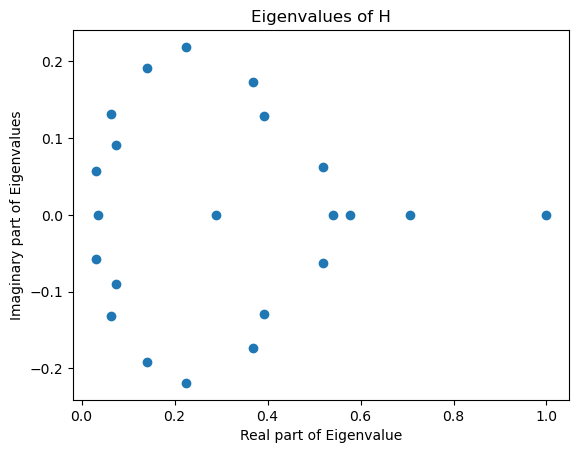

In [8]:
plt.scatter(ritz_values_at_steps[21].real, ritz_values_at_steps[21].imag)
plt.xlabel('Real part of Eigenvalue')
plt.ylabel('Imaginary part of Eigenvalues')
plt.title('Eigenvalues of H')
plt.show()

### 6.4.4 Rate of Convergence

In [9]:
# Create list to see the difference between largest ritz value and eigenvals of A
# np.eig gets the eigenvalues and automatically sorts them in descending sort, so by taking the eigenvalue
# at 0 we get the highest eigenvalue
convergence_list = []
convergence_list_2 = []
convergence_list_3 = []

largest_A_eigenvalue = eigenvalues[0]
second_A_eigenvalue = eigenvalues[1]
third_A_eigenvalue = eigenvalues[2]

for i in range(len(largest_ritz_values)):
    
    if largest_ritz_values[i] is not None:
        convergence_list.append(largest_A_eigenvalue - largest_ritz_values[i])
    else:
        convergence_list.append(None)  # Handle missing largest Ritz value
    
    if second_largest_ritz_values[i] is not None:
        convergence_list_2.append(second_A_eigenvalue - second_largest_ritz_values[i])
    else:
        convergence_list_2.append(None)  # Handle missing second largest Ritz value
    
    if third_largest_ritz_values[i] is not None:
        convergence_list_3.append(third_A_eigenvalue - third_largest_ritz_values[i])
    else:
        convergence_list_3.append(None)  # Handle missing third largest Ritz value


C:\Users\danie\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\danie\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


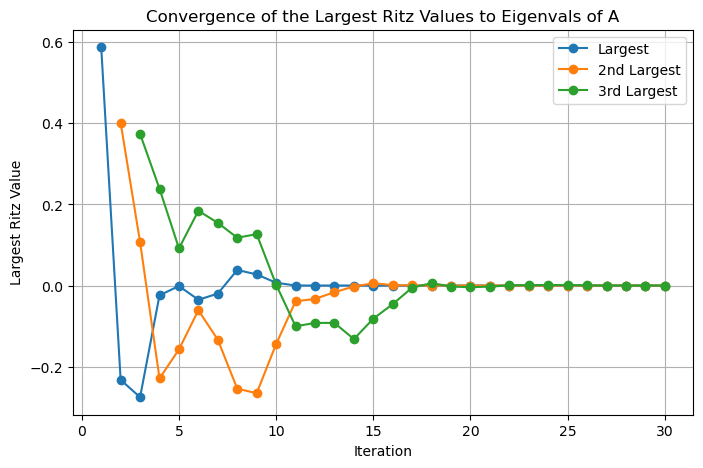

In [10]:
# Plot the convergence of the largest Ritz values
plt.figure(figsize=(8, 5))
plt.plot(range(1, m + 1), convergence_list, marker='o', label='Largest')
plt.plot(range(1, m + 1), convergence_list_2, marker='o', label = '2nd Largest')
plt.plot(range(1, m + 1), convergence_list_3, marker='o', label= '3rd Largest')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Largest Ritz Value')
plt.title('Convergence of the Largest Ritz Values to Eigenvals of A')
plt.grid(True)
plt.show()



**Initial Behavior:**

The largest Ritz value (blue) starts with significant deviations but rapidly converges towards zero, indicating quick alignment with the largest eigenvalue of **A**.
The second largest (orange) and third largest (green) Ritz values also show initial fluctuations but are less volatile than the largest Ritz value.

**Intermediate Iterations (Iterations 0-10):**

There is notable oscillation in the second and third largest Ritz values, suggesting instability in the early steps of the iterative process.
The largest Ritz value stabilizes quicker than the second and third largest values.


**Convergence (Iterations 10-30):**

All three Ritz values show signs of convergence by around iteration 10. The oscillations decrease, and the values stabilize.
By iteration 15, the largest, second largest, and third largest Ritz values align closely with the corresponding eigenvalues of  **A**, remaining stable for the rest of the iterations.

**Overall Convergence:**

The plot demonstrates that the Ritz values eventually converge to the eigenvalues of  **A**. The convergence is relatively fast for the largest Ritz value, while the second and third largest Ritz values take a bit longer to stabilize.